In [1]:
pip install accelerate -U

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers dataset torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from datasets import Dataset

In [4]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer

model_name = "dbmdz/bert-base-turkish-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # num_labels corresponds to binary classification (negative, positive)

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

In [5]:
# Load your dataset
train_df = pd.read_csv('/nfs/storage1/home/biyikh/turkish_sentiment/train.csv', encoding = 'utf-8')
test_df = pd.read_csv('/nfs/storage1/home/biyikh/turkish_sentiment/test.csv', encoding = 'utf-8')

In [6]:
print(train_df.head())

                                                text  label
0  her şey çok güzel fakat tek kargoyla ilgili bi...      1
1  Her zaman rahatça kullanılabilecek ruj değil ....      0
2  oturma odası aydınlatmada kullanıyorum. gayet ...      1
3  apartmanımızın zemin katı ve deposu için aldım...      1
4   bi arada dipsiz kuyuya atma sahnesi hiç bitme...      0


In [7]:
# Function to tokenize the text
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Convert DataFrame to Hugging Face dataset format, then tokenize
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/9049 [00:00<?, ? examples/s]

Map:   0%|          | 0/2263 [00:00<?, ? examples/s]

In [8]:
training_args = TrainingArguments(
    output_dir="./results",          # where to save the model
    evaluation_strategy="epoch",     # evaluation is done at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir='./logs',            # directory for storing logs
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

/home/biyikh/.local/lib/python3.7/site-packages/transformers/optimization.py:415: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
/home/biyikh/.local/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
1,No log,0.208280
2,0.245200,0.215082
3,0.245200,0.243970


/home/biyikh/.local/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/biyikh/.local/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=849, training_loss=0.19216812457296958, metrics={'train_runtime': 388.4091, 'train_samples_per_second': 69.893, 'train_steps_per_second': 2.186, 'total_flos': 7142675819857920.0, 'train_loss': 0.19216812457296958, 'epoch': 3.0})

In [9]:
results = trainer.evaluate()
print(results)

/home/biyikh/.local/lib/python3.7/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.24396954476833344, 'eval_runtime': 9.4122, 'eval_samples_per_second': 240.434, 'eval_steps_per_second': 3.825, 'epoch': 3.0}


In [10]:
# Time to save the model and the tokenizer!
model_path = 'nfs/storage1/home/biyikh/turkish_sentiment'

# Saving the model:
model.save_pretrained(model_path)

# Saving the tokenizer:
tokenizer.save_pretrained(model_path)

('nfs/storage1/home/biyikh/turkish_sentiment/tokenizer_config.json',
 'nfs/storage1/home/biyikh/turkish_sentiment/special_tokens_map.json',
 'nfs/storage1/home/biyikh/turkish_sentiment/vocab.txt',
 'nfs/storage1/home/biyikh/turkish_sentiment/added_tokens.json')

In [11]:
from transformers import BertTokenizer, BertForSequenceClassification

In [12]:
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

In [13]:
from transformers import pipeline

In [14]:
pip install xformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached xformers-0.0.25.post1.tar.gz (4.1 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-3aogat57/xformers_7f96cf42c43e4429ae6403bb00f65f09/setup.py", line 482, in <module>
          extensions, extensions_metadata = get_extensions()
        File "/tmp/pip-install-3aogat57/xformers_7f96cf42c43e4429ae6403bb00f65f09/setup.py", line 328, in get_extensions
          flash_version = get_flash_version()
        File "/tmp/pip-install-3aogat57/xformers_7f96cf42c43e4429ae6403bb00f65f09/setup.py", line 72, in get_flash_version
          cwd=flash_dir,
        File "/usr/local/anaconda3/lib/python3.7

In [15]:
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [16]:
predictions = classifier(list(test_df['text']), truncation=True)

In [17]:
predicted_labels = [int(pred['label'].split('_')[-1]) for pred in predictions]
true_labels = list(test_df['label'])

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1132
           1       0.93      0.93      0.93      1131

    accuracy                           0.93      2263
   macro avg       0.93      0.93      0.93      2263
weighted avg       0.93      0.93      0.93      2263



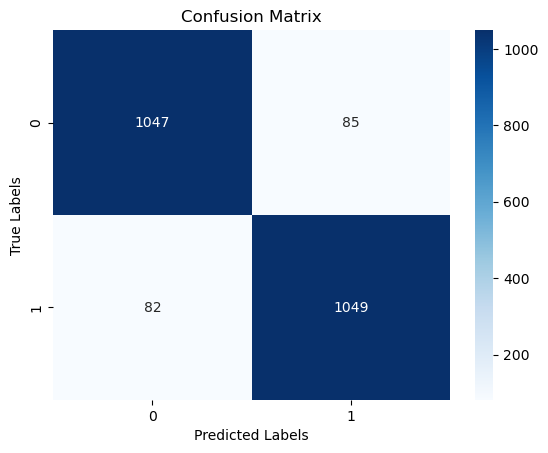

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(true_labels, predicted_labels))

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
test_accuracy = accuracy_score(true_labels, predicted_labels)
print('Best Model Test Accuracy: %.3f' % test_accuracy)

Best Model Test Accuracy: 0.926
